In [1]:
import cv2

In [2]:
import sys, os
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as  tf
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [4]:
imagePath = sys.argv[1]

In [5]:
cascPath = "haarcascade_frontalface_default.xml"

In [6]:
faceCascade = cv2.CascadeClassifier(cascPath)

In [7]:
class_names = ["man", "woman"]
SIZE = 256

In [8]:
DATADIR = os.getcwd()
print(DATADIR)

/Users/olegbrusilovski/Work/python/ML/Gender Classification


In [9]:
train_df = []
for name in class_names:
    folder = os.path.join(DATADIR, name)
    for img in os.listdir(folder):
        try:
            image = cv2.imread(os.path.join(folder, img), cv2.IMREAD_GRAYSCALE)
#             image = cv2.imread("2019-02-04T18_44_16+02_00.jpg", cv2.IMREAD_GRAYSCALE)
            faces = faceCascade.detectMultiScale(
                image,
                scaleFactor=1.2,
                minNeighbors=5,
                minSize=(30,30)
            )
            print(f'Found {len(faces)} faces')
            if len(faces) == 1:
                for (x,y,w,h) in faces:
                    image = image[y: y+h, x: x+w]

                ind = class_names.index(name)
                new_image = cv2.resize(image, (SIZE, SIZE))    
#                 plt.imshow(new_image, cmap='gray')
                train_df.append([new_image, ind])
#                 break
            else:
                continue
        except Exception as e:
            print(e)

Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 

Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 

Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 

Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 3 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 

Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 

Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 

Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 

Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 

Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 

Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 

Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 

Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 

Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 

Found 3 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 4 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 

Found 2 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 3 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 

Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 3 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 3 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 3 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 

Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 3 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 

Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 2 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 3 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 

Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 

Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 3 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 4 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 0 faces
Found 

Found 0 faces
Found 0 faces
Found 3 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 2 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 

Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 2 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 2 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 3 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 0 faces
Found 1 faces
Found 1 faces
Found 1 faces
Found 0 faces
Found 0 faces
Found 

In [10]:
len(train_df)

5947

In [11]:
# plt.imshow(train_df[3][0])
train_df[3]


[array([[ 92,  88,  81, ...,  16,  16,  16],
        [ 89,  85,  80, ...,  16,  16,  16],
        [ 84,  82,  79, ...,  16,  16,  16],
        ...,
        [213, 217, 224, ...,  25,  25,  25],
        [218, 220, 224, ...,  24,  24,  24],
        [222, 223, 224, ...,  24,  24,  24]], dtype=uint8), 0]

In [12]:
train_df[0][0].shape

(256, 256)

In [13]:
import random

In [14]:
random.shuffle(train_df)

In [15]:
for item in train_df[:20]:
    print(item[1])

0
0
0
1
1
0
0
1
0
0
0
0
0
0
1
0
0
1
1
0


In [16]:
women_list = []
men_list = []
for i in train_df:
    if i[1] == 1:
        women_list.append(i)
    else:
        men_list.append(i)

In [17]:
print(f'women: {len(women_list)} men: {len(men_list)}') 

women: 3103 men: 2844


In [ ]:
# class_weight = {0: 1, 1: 0.91}

In [18]:
X = []
y = []
for features, labels in train_df:
    X.append(features)
    y.append(labels)

In [ ]:
len(X)

In [ ]:
len(y)

In [19]:
import numpy as np

In [ ]:
X[0].shape

In [20]:
X_train = np.array(X).reshape(-1, SIZE, SIZE, 1)

In [ ]:
X_train.shape

In [21]:
X_train = X_train / 255.0
X_train[1:]

array([[[[0.81568627],
         [0.81176471],
         [0.78431373],
         ...,
         [0.19607843],
         [0.18823529],
         [0.18823529]],

        [[0.81176471],
         [0.80784314],
         [0.78039216],
         ...,
         [0.19607843],
         [0.18823529],
         [0.18823529]],

        [[0.8       ],
         [0.79215686],
         [0.76862745],
         ...,
         [0.19607843],
         [0.18823529],
         [0.18431373]],

        ...,

        [[0.76862745],
         [0.76862745],
         [0.78039216],
         ...,
         [0.17647059],
         [0.17254902],
         [0.17254902]],

        [[0.76862745],
         [0.77254902],
         [0.78039216],
         ...,
         [0.17254902],
         [0.17254902],
         [0.17254902]],

        [[0.76862745],
         [0.77254902],
         [0.78039216],
         ...,
         [0.17254902],
         [0.17254902],
         [0.17254902]]],


       [[[0.61960784],
         [0.61960784],
         [0.62

In [22]:
import time

In [ ]:
# layers = [0, 1, 2]
# nodes = [16, 32, 64]
# conv_layer = [1, 2, 3]

# for layer in layers:
#     for node in nodes:
#         for conv in conv_layer:
#             model = keras.Sequential()
#             NAME = f'cnn-gender-layer-{layer}-nodes-{node}-conv_layer-{conv}-{int(time.time())}'
#             tensor_board = TensorBoard(log_dir=f'board/{NAME}')
            
#             model.add(Conv2D(node, (3,3), input_shape=X_train.shape[1:]))
#             model.add(Activation("relu"))
#             model.add(MaxPooling2D(pool_size=(2,2)))
#             model.add(Activation("relu"))
#             model.add(Dropout(0.2))
            
#             for i in range(conv):
#                 model.add(Conv2D(node, (3,3)))
#                 model.add(Activation("relu"))
#                 model.add(MaxPooling2D(pool_size=(2,2)))
#                 model.add(Activation("relu"))
#                 model.add(Dropout(0.2))

#             model.add(Flatten())
#             for x in range(layer):                
#                 model.add(Dense(node))
#                 model.add(Activation("relu"))

#             model.add(Dense(1))
#             model.add(Activation("sigmoid"))
            
#             model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
#             model.fit(X_train, y, epochs=20, batch_size=16, validation_split=0.1, callbacks=[tensor_board], class_weight=class_weight)

In [23]:
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.optimizers import SGD

In [22]:
# THE CHOSEN ONE MODEL
# 1  64  2

            NAME = f'cnn-30epochs-32batch-ZeroPad-lr1-e5-{int(time.time())}'
            tensor_board = TensorBoard(log_dir=f'board/{NAME}')

            model = keras.Sequential()
    
            model.add(ZeroPadding2D((2,2), input_shape=X_train.shape[1:]))
            model.add(Conv2D(64, (3,3)))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Activation("relu"))
            model.add(Dropout(0.2))
            
            model.add(ZeroPadding2D((2,2)))
            model.add(Conv2D(64, (3,3)))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Activation("relu"))
            model.add(Dropout(0.2))
            
            model.add(ZeroPadding2D((2,2)))
            model.add(Conv2D(64, (3,3)))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Activation("relu"))
            model.add(Dropout(0.2))


            model.add(Flatten())
            model.add(Dense(64))
            model.add(Activation("relu"))
            model.add(Dropout(0.5))

            model.add(Dense(1))
            model.add(Activation("sigmoid"))
            
            lr = 1e-4
            epochs = 30
            adam = keras.optimizers.Adam(lr=lr, decay=lr/epochs)
            model.compile(loss='binary_crossentropy',  optimizer=adam, metrics=['accuracy'])
            model.fit(X_train, y, epochs=epochs, batch_size=32, validation_split=0.1, callbacks=[tensor_board])
#             , class_weight=class_weight

Train on 5352 samples, validate on 595 samples
Epoch 1/40
5352/5352 [==============================] - 411s 77ms/sample - loss: 0.6397 - accuracy: 0.6336 - val_loss: 0.6290 - val_accuracy: 0.6857
Epoch 2/40
5352/5352 [==============================] - 441s 82ms/sample - loss: 0.5841 - accuracy: 0.6962 - val_loss: 0.5642 - val_accuracy: 0.7176
Epoch 3/40
5352/5352 [==============================] - 469s 88ms/sample - loss: 0.5501 - accuracy: 0.7222 - val_loss: 0.5739 - val_accuracy: 0.7311
Epoch 4/40
5352/5352 [==============================] - 489s 91ms/sample - loss: 0.5173 - accuracy: 0.7442 - val_loss: 0.5395 - val_accuracy: 0.7462
Epoch 5/40
5352/5352 [==============================] - 417s 78ms/sample - loss: 0.5027 - accuracy: 0.7545 - val_loss: 0.5166 - val_accuracy: 0.7647
Epoch 6/40
5352/5352 [==============================] - 417s 78ms/sample - loss: 0.4892 - accuracy: 0.7678 - val_loss: 0.4952 - val_accuracy: 0.7748
Epoch 7/40
5352/5352 [==============================] - 457

In [ ]:
model.save('model-30epochs-32batch-ZeroPad-lr-1e-4.h5')

In [ ]:
# VGG 16
X_train.shape

In [ ]:
# def VGG16(weights_path=None):
#     model = keras.Sequential()
#     model.add(ZeroPadding2D((2,2), input_shape=(X_train.shape[1:])))
#     model.add(Conv2D(64,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(64,(3,3)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
    
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(128,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(128,(3,3)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(256,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(256,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(256,(3,3)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
    
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(512,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(512,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(512,(3,3)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
    
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(512,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(512,(3,3)))
#     model.add(Activation("relu"))
#     model.add(ZeroPadding2D((2,2)))
#     model.add(Conv2D(512,(3,3)))
#     model.add(Activation("relu"))
#     model.add(MaxPooling2D(pool_size=(2,2)))
    
#     model.add(Flatten())
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(1, activation='sigmoid'))
    
#     if weights_path:
#         model.load_weights(weights_path)
    
    
#     return model

# vgg = VGG16('vgg16_weights.h5')
# sgd = SGD(lr=0.1,decay=1e-6, momentum=0.9, nesterov=True)
# vgg.compile(optimizer=sgd, loss="binary_crossentropy")
# vgg.fit(X_train, y, epochs=20, batch_size=16, validation_split=0.1, callbacks=[tensor_board], class_weight=class_weight)

In [24]:
            # Regularized 
    
            NAME = f'cnn-gender-regularized-lr-e5-{int(time.time())}'
            tensor_board = TensorBoard(log_dir=f'board/{NAME}')
            
            model1 = keras.Sequential()
    
            model1.add(ZeroPadding2D((2,2), input_shape=(X_train.shape[1:])))
            model1.add(Conv2D(64, (3,3)))
            model1.add(BatchNormalization())
            model1.add(Activation("relu"))
            model1.add(MaxPooling2D(pool_size=(2,2)))
            model1.add(Activation("relu"))
            
            model1.add(ZeroPadding2D((2,2)))
            model1.add(Conv2D(64, (3,3)))
            model1.add(BatchNormalization())
            model1.add(Activation("relu"))
            model1.add(MaxPooling2D(pool_size=(2,2)))
            model1.add(Activation("relu"))
            
            model1.add(ZeroPadding2D((2,2)))
            model1.add(Conv2D(64, (3,3)))
            model1.add(Activation("relu"))
            model1.add(MaxPooling2D(pool_size=(2,2)))
            model1.add(Activation("relu"))


            model1.add(Flatten())
            model1.add(Dense(64))
            model1.add(Activation("relu"))
            
            model1.add(Dropout(0.5))

            model1.add(Dense(1))
            model1.add(Activation("sigmoid"))
            
            lr = 1e-5
            epochs = 30
            adam = Adam(lr=lr, decay=lr/epochs)
            model1.compile(loss='binary_crossentropy',  optimizer=adam, metrics=['accuracy'])
            model1.fit(X_train, y, epochs=epochs, batch_size=32, validation_split=0.1, callbacks=[tensor_board])
#             class_weight=class_weight

Train on 5352 samples, validate on 595 samples
Epoch 1/30
5352/5352 [==============================] - 944s 176ms/sample - loss: 0.6074 - accuracy: 0.6702 - val_loss: 0.7014 - val_accuracy: 0.4605
Epoch 2/30
5352/5352 [==============================] - 959s 179ms/sample - loss: 0.5320 - accuracy: 0.7311 - val_loss: 0.7154 - val_accuracy: 0.4672
Epoch 3/30
5352/5352 [==============================] - 1058s 198ms/sample - loss: 0.4790 - accuracy: 0.7687 - val_loss: 0.5575 - val_accuracy: 0.7193
Epoch 4/30
5352/5352 [==============================] - 930s 174ms/sample - loss: 0.4482 - accuracy: 0.7924 - val_loss: 0.4221 - val_accuracy: 0.8017
Epoch 5/30
5352/5352 [==============================] - 892s 167ms/sample - loss: 0.4103 - accuracy: 0.8100 - val_loss: 0.3974 - val_accuracy: 0.8134
Epoch 6/30
5352/5352 [==============================] - 1031s 193ms/sample - loss: 0.3843 - accuracy: 0.8272 - val_loss: 0.3670 - val_accuracy: 0.8387
Epoch 7/30
5352/5352 [=============================

In [ ]:
# # gender detection model
# NAME = f'cnn-gender-pre-built-{int(time.time())}'
# tensor_board = TensorBoard(log_dir=f'board/{NAME}')

# model2 = keras.Sequential()
# model2.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:]))
# model2.add(Activation("relu"))
# model2.add(BatchNormalization())
# model2.add(MaxPooling2D(pool_size=(3,3)))
# model2.add(Dropout(0.25))

# model2.add(Conv2D(64, (3,3), padding="same"))
# model2.add(Activation("relu"))
# model2.add(BatchNormalization())
# model2.add(Conv2D(64, (3,3), padding="same"))
# model2.add(Activation("relu"))
# model2.add(BatchNormalization())
# model2.add(MaxPooling2D(pool_size=(2,2)))
# model2.add(Dropout(0.25))

# model2.add(Conv2D(128, (3,3), padding="same"))
# model2.add(Activation("relu"))
# model2.add(BatchNormalization())
# model2.add(Conv2D(128, (3,3), padding="same"))
# model2.add(Activation("relu"))
# model2.add(BatchNormalization())
# model2.add(MaxPooling2D(pool_size=(2,2)))
# model2.add(Dropout(0.25))

# model2.add(Flatten())
# model2.add(Dense(1024))
# model2.add(Activation("relu"))
# model2.add(BatchNormalization())
# model2.add(Dropout(0.5))

# model2.add(Dense(1))
# model2.add(Activation("sigmoid"))

# adam = Adam(lr=1e-3, decay=1e-3/20)
# model2.compile(loss='binary_crossentropy',  optimizer=adam, metrics=['accuracy'])
# model2.fit(X_train, y, epochs=20, batch_size=64, validation_split=0.1, callbacks=[tensor_board], class_weight=class_weight)

In [ ]:
# model 5
NAME = f'cnn-gender-batch-normalized-{int(time.time())}'
tensor_board = TensorBoard(log_dir=f'board/{NAME}')

model2 = keras.Sequential()

model2.add(ZeroPadding2D((2,2), input_shape=(X_train.shape[1:])))
model2.add(Conv2D(64, (3,3)))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Activation("relu"))
model2.add(Dropout(0.2))

model2.add(ZeroPadding2D((2,2)))
model2.add(Conv2D(64, (3,3)))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Activation("relu"))
model2.add(Dropout(0.2))

model2.add(ZeroPadding2D((2,2)))           
model2.add(Conv2D(64, (3,3)))
model2.add(Activation("relu"))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Activation("relu"))
model2.add(Dropout(0.2))


model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation("relu"))

model2.add(Dense(1))
model2.add(Activation("sigmoid"))

adam2 = keras.optimizers.Adam(lr=1e-3, decay=1e-3/20)
model2.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, y, epochs=20, batch_size=16, validation_split=0.1, callbacks=[tensor_board], class_weight=class_weight)

In [ ]:
new_model = keras.models.load_model('model.h5')
new_model.fit(X_train, y, epochs=30, batch_size=16, validation_split=0.1, callbacks=[tensor_board], class_weight=class_weight)

In [31]:
# For classification report
def prepare(image):
#     filepath, 
#     image = cv2.imread(os.path.join(f'{DATADIR}/test/', filepath), cv2.IMREAD_GRAYSCALE)
    faces = faceCascade.detectMultiScale(
        image,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30,30)
    )
    print(f'Found {len(faces)} faces')
    try:
        if len(faces) == 1:
            for (x,y,w,h) in faces:
                image = image[y: y+h, x: x+w]
            new_array = cv2.resize(image, (SIZE,  SIZE))
            plt.imshow(new_array, cmap='gray')
            new_array = new_array/255.0
            return new_array.reshape(-1, SIZE, SIZE, 1)
    except Exception as e:
        print(e)
#     else:
#         print("No face was found")
#         return image.reshape(-1, SIZE, SIZE, 1)

In [25]:
# For folder sorting
def prepare(filepath):
    image = cv2.imread(os.path.join(f'{DATADIR}/test/', filepath), cv2.IMREAD_GRAYSCALE)
    faces = faceCascade.detectMultiScale(
        image,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(30,30)
    )
    print(f'Found {len(faces)} faces')
    try:
        if len(faces) == 1:
            for (x,y,w,h) in faces:
                image = image[y: y+h, x: x+w]
            new_array = cv2.resize(image, (SIZE,  SIZE))
            plt.imshow(new_array, cmap='gray')
            new_array = new_array/255.0
            return new_array.reshape(-1, SIZE, SIZE, 1)
    except Exception as e:
        print(e)
#     else:
#         print("No face was found")
#         return image.reshape(-1, SIZE, SIZE, 1)

In [ ]:
best_model = keras.models.load_model('model-30epochs-32batch-ZeroPad-lr-1e-4.h5')

Found 1 faces
Gender man
2019-03-27T16_05_30+02_00.jpg
Found 1 faces
Gender man
2019-03-22T09_28_18+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-02T13_08_34+03_00.jpg
Found 1 faces
Gender man
2019-03-28T00_57_06+02_00.jpg
Found 1 faces
Gender man
2019-04-03T02_30_49+03_00.jpg
Found 1 faces
Gender man
2019-03-27T23_30_56+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-03-26T22_10_34+02_00.jpg
Found 1 faces
Gender man
2019-03-28T13_32_29+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-04T22_10_47+03_00.jpg
Found 1 faces
Gender woman
2019-04-03T13_31_49+03_00.jpg
Found 1 faces
Gender man
2019-03-28T21_33_17+02_00.jpg
Found 1 faces
Gender woman
2019-03-20T22_21_49+02_00.jpg
Found 1 faces
Gender man
2019-

Found 1 faces
Gender man
2019-03-23T08_51_43+02_00.jpg
Found 1 faces
Gender woman
2019-03-22T00_29_50+02_00.jpg
Found 1 faces
Gender woman
2019-03-26T21_42_30+02_00.jpg
Found 1 faces
Gender woman
2019-03-29T12_30_14+03_00.jpg
Found 1 faces
Gender woman
2019-03-23T07_10_48+02_00.jpg
Found 1 faces
Gender woman
2019-03-29T09_17_56+03_00.jpg
Found 1 faces
Gender man
2019-03-29T08_44_18+03_00.jpg
Found 1 faces
Gender man
2019-03-21T23_59_14+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-21T20_22_58+02_00.jpg
Found 1 faces
Gender woman
2019-03-23T15_04_22+02_00.jpg
Found 1 faces
Gender man
2019-03-29T09_16_50+03_00.jpg
Found 1 faces
Gender man
2019-03-30T18_56_46+03_00.jpg
Found 1 faces
Gender man
2019-03-20T19_01_31+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-23T17_42_06+02_00.jpg
Found 1 faces
Gend

Gender woman
2019-03-25T19_27_14+02_00.jpg
Found 1 faces
Gender man
2019-04-02T01_45_04+03_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-29T13_13_48+03_00.jpg
Found 1 faces
Gender man
2019-04-01T23_55_49+03_00.jpg
Found 1 faces
Gender woman
2019-03-22T03_17_35+02_00.jpg
Found 1 faces
Gender man
2019-03-23T07_08_00+02_00.jpg
Found 1 faces
Gender woman
2019-03-23T17_43_19+02_00.jpg
Found 1 faces
Gender woman
2019-03-21T02_58_58+02_00.jpg
Found 1 faces
Gender man
2019-03-31T22_17_57+03_00.jpg
Found 1 faces
Gender man
2019-04-01T06_13_13+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-04T14_58_29+03_00.jpg
Found 1 faces
Gender man
2019-04-05T05_37_51+03_00.jpg
Found 1 faces
Gender woman
2019-04-02T01_41_07+03_00.jpg
Found 1 faces
Gender woman
2019-03-26T10_35_45+02_00.jpg
Found 1 faces
Gender woman
201

Found 1 faces
Gender man
2019-04-03T02_59_48+03_00.jpg
Found 1 faces
Gender man
2019-03-28T17_58_11+02_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-26T01_12_28+02_00.jpg
Found 1 faces
Gender woman
2019-04-07T10_18_32+03_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-23T16_45_48+02_00.jpg
Found 1 faces
Gender man
2019-03-28T04_23_13+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-04T22_14_19+03_00.jpg
Found 3 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 fac

Gender man
2019-04-02T09_47_20+03_00.jpg
Found 1 faces
Gender woman
2019-04-04T10_11_47+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-26T12_43_59+02_00.jpg
Found 1 faces
Gender man
2019-03-31T16_34_49+03_00.jpg
Found 1 faces
Gender woman
2019-04-05T06_48_18+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-30T22_55_45+03_00.jpg
Found 1 faces
Gender man
2019-03-26T10_49_50+02_00.jpg
Found 1 faces
Gender woman
2019-04-04T15_47_36+03_00.jpg
Found 1 faces
Gender woman
2019-03-22T15_13_29+02_00.jpg
Found 1 faces
Gender man
2019-03-25T18_57_51+02_00.jpg
Found 1 faces
Gender man
2019-03-24T10_09_30+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-04T13_58_30+03_00.jpg
Found 2 faces
When using data tensors as inp

Found 1 faces
Gender woman
2019-04-03T07_13_29+03_00.jpg
Found 1 faces
Gender man
2019-03-31T22_22_31+03_00.jpg
Found 1 faces
Gender man
2019-03-28T02_47_44+02_00.jpg
Found 1 faces
Gender woman
2019-03-31T22_35_01+03_00.jpg
Found 1 faces
Gender woman
2019-04-05T04_01_06+03_00.jpg
Found 1 faces
Gender woman
2019-04-03T11_03_00+03_00.jpg
Found 1 faces
Gender woman
2019-03-24T19_35_22+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-25T22_17_20+02_00.jpg
Found 1 faces
Gender woman
2019-03-25T11_22_11+02_00.jpg
Found 1 faces
Gender woman
2019-04-02T19_01_06+03_00.jpg
Found 1 faces
Gender woman
2019-03-23T18_04_39+02_00.jpg
Found 1 faces
Gender woman
2019-03-26T14_49_41+02_00.jpg
Found 1 faces
Gender woman
2019-04-02T00_04_28+03_00.jpg
Found 1 faces
Gender man
2019-03-23T18_29_29+02_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 fa

Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-04-03T10_36_36+03_00.jpg
Found 1 faces
Gender man
2019-03-22T00_31_00+02_00.jpg
Found 1 faces
Gender man
2019-03-29T06_55_25+03_00.jpg
Found 1 faces
Gender man
2019-03-28T21_36_32+02_00.jpg
Found 1 faces
Gender woman
2019-03-27T14_36_40+02_00.jpg
Found 1 faces
Gender man
2019-04-02T21_50_48+03_00.jpg
Found 1 faces
Gender man
2019-03-26T01_11_56+02_00.jpg
Found 1 faces
Gender woman
2019-03-25T22_19_02+02_00.jpg
Found 1 faces
Gender man
2019-04-03T02_33_10+03_00.jpg
Found 1 faces
Gender man
2019-04-04T11_05_22+03_00.jpg
Found 1 faces
Gender man
2019-04-01T00_19_42+03_00.jpg
Found 1 faces
Gender man
2019-03-22T01_48_24+02_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-04-02T13_10_51+03_00.jpg
Found 1 faces
Gender woman
2019-03-22T00_00_56+02_00.jpg
Found 0 faces
When using

Found 1 faces
Gender man
2019-03-28T03_22_21+02_00.jpg
Found 1 faces
Gender man
2019-04-07T12_01_23+03_00.jpg
Found 1 faces
Gender woman
2019-04-02T13_07_59+03_00.jpg
Found 1 faces
Gender man
2019-03-26T19_50_20+02_00.jpg
Found 1 faces
Gender man
2019-03-24T11_54_51+02_00.jpg
Found 1 faces
Gender man
2019-03-23T17_39_42+02_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-28T17_23_29+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-03-25T12_57_53+02_00.jpg
Found 1 faces
Gender man
2019-04-03T13_11_31+03_00.jpg
Found 1 faces
Gender woman
2019-03-25T11_21_01+02_00.jpg
Found 1 faces
Gender man
2019-03-28T03_23_27+02_00.jpg
Found 1 faces
Gender man
2019-04-03T13_46_34+03_00.jpg
Found 1 faces
Gender woman
2019-03

Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-29T09_43_43+03_00.jpg
Found 1 faces
Gender man
2019-03-26T15_44_30+02_00.jpg
Found 1 faces
Gender man
2019-03-27T13_43_43+02_00.jpg
Found 1 faces
Gender woman
2019-03-28T08_27_18+02_00.jpg
Found 1 faces
Gender man
2019-04-03T11_24_23+03_00.jpg
Found 1 faces
Gender woman
2019-03-28T06_31_24+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-04-03T02_53_43+03_00.jpg
Found 1 faces
Gender man
2019-04-02T03_24_24+03_00.jpg
Found 1 faces
Gender man
2019-04-04T17_14_51+03_00.jpg
Found 1 faces
Gender woman
2019-03-24T10_14_12+02_00.jpg
Found 1 faces
Gender woman
2019-04-07T09_58_49+03_00.jpg
Found 1 faces
Gender man
2019-04-02T21_51_26+03_00.jpg
Found 1 faces
Gender man
2019-03-23T18_25_16+02_00.jpg
Found 1 faces
Gender woman
2019-03-22T20_21_39+02_00.jpg
Found 1 faces
Gender

Found 1 faces
Gender woman
2019-03-26T11_11_07+02_00.jpg
Found 1 faces
Gender man
2019-04-02T03_23_53+03_00.jpg
Found 1 faces
Gender man
2019-03-28T06_52_11+02_00.jpg
Found 1 faces
Gender man
2019-03-25T04_48_28+02_00.jpg
Found 1 faces
Gender woman
2019-03-28T20_12_12+02_00.jpg
Found 1 faces
Gender woman
2019-03-25T07_22_28+02_00.jpg
Found 1 faces
Gender man
2019-03-31T23_01_54+03_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-03-28T04_57_03+02_00.jpg
Found 1 faces
Gender man
2019-04-01T13_29_08+03_00.jpg
Found 1 faces
Gender man
2019-03-23T14_24_00+02_00.jpg
Found 1 faces
Gender man
2019-04-04T15_48_56+03_00.jpg
Found 1 faces
Gender man
2019-04-01T23_57_31+03_00.jpg
Found 1 faces
Gender man
2019-03-20T21_15_14+02_00.jpg
Found 1 faces
Gender man
2019-03-30T16_01_57+03_00.jpg
Found 1 faces
Gender woman
2019-03-29T01_57_55+02_00.jpg
Found 1 faces
Gender man
2019-03-28T05_39_17+02_00.jpg
Found 1 fa

Gender man
2019-04-05T03_59_55+03_00.jpg
Found 1 faces
Gender man
2019-03-22T23_52_11+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-03-20T17_25_20+02_00.jpg
Found 1 faces
Gender man
2019-04-02T09_48_32+03_00.jpg
Found 1 faces
Gender man
2019-03-27T23_25_54+02_00.jpg
Found 1 faces
Gender man
2019-03-31T16_33_40+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-22T13_31_06+02_00.jpg
Found 1 faces
Gender woman
2019-04-03T12_45_44+03_00.jpg
Found 1 faces
Gender man
2019-03-24T01_16_14+02_00.jpg
Found 1 faces
Gender man
2019-04-05T01_12_15+03_00.jpg
Found 1 faces
Gender man
2019-04-03T02_58_24+03_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-26T18_36_14+02_00.jpg
Found 0 faces
When using data tensors as input to 

Gender woman
2019-04-04T15_44_31+03_00.jpg
Found 1 faces
Gender man
2019-03-21T04_42_59+02_00.jpg
Found 1 faces
Gender man
2019-03-31T23_02_28+03_00.jpg
Found 1 faces
Gender man
2019-04-03T11_25_57+03_00.jpg
Found 1 faces
Gender man
2019-03-31T06_57_41+03_00.jpg
Found 1 faces
Gender woman
2019-03-27T20_21_05+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-04-03T12_44_35+03_00.jpg
Found 1 faces
Gender man
2019-04-04T13_03_29+03_00.jpg
Found 1 faces
Gender man
2019-04-03T02_52_37+03_00.jpg
Found 1 faces
Gender woman
2019-04-01T19_34_13+03_00.jpg
Found 1 faces
Gender man
2019-03-22T06_58_11+02_00.jpg
Found 1 faces
Gender man
2019-04-01T05_35_46+03_00.jpg
Found 1 faces
Gender man
2019-03-23T07_09_04+02_00.jpg
Found 1 faces
Gender man
2019-03-23T22_47_45+02_00.jpg
Found 1 faces
Gender man
2019-03-21T23_19_40+02_00.jpg
Found 1 faces
Gender man
2019-04-02T10_20_44+03_00.jpg
Found 0 faces
When using dat

Found 1 faces
Gender man
2019-03-21T20_22_18+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-04T13_56_08+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-24T13_15_18+02_00.jpg
Found 1 faces
Gender woman
2019-04-07T10_21_57+03_00.jpg
Found 1 faces
Gender man
2019-03-28T01_59_48+02_00.jpg
Found 1 faces
Gender man
2019-03-28T04_58_46+02_00.jpg
Found 1 faces
Gender woman
2019-04-04T15_05_23+03_00.jpg
Found 1 faces
Gender man
2019-03-28T19_36_01+02_00.jpg
Found 1 faces
Gender man
2019-04-04T15_02_59+03_00.jpg
Found 1 faces
Gender man
2019-03-27T21_23_13+02_00.jpg
Found 1 faces
Gender man
2019-03-27T16_07_54+02_00.jpg
Found 1 faces
Gender man
2019-04-03T10_14_06+03_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04

Gender man
2019-03-22T09_30_02+02_00.jpg
Found 1 faces
Gender man
2019-03-25T03_20_19+02_00.jpg
Found 1 faces
Gender man
2019-04-01T13_37_51+03_00.jpg
Found 1 faces
Gender man
2019-03-26T17_31_50+02_00.jpg
Found 1 faces
Gender woman
2019-04-01T06_09_34+03_00.jpg
Found 1 faces
Gender woman
2019-03-26T19_48_36+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-03-30T22_49_18+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-22T20_25_43+02_00.jpg
Found 1 faces
Gender man
2019-03-30T05_01_48+03_00.jpg
Found 1 faces
Gender man
2019-04-03T06_34_41+03_00.jpg
Found 1 faces
Gender woman
2019-03-28T17_55_19+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-26T14_50_48+02_00.jpg
Found 1 faces
Gender man
2019-03-22T00_33_14+0

Gender man
2019-04-01T21_14_32+03_00.jpg
Found 1 faces
Gender man
2019-04-03T03_29_31+03_00.jpg
Found 1 faces
Gender man
2019-04-04T21_06_49+03_00.jpg
Found 1 faces
Gender woman
2019-03-25T12_58_59+02_00.jpg
Found 1 faces
Gender man
2019-04-02T01_47_24+03_00.jpg
Found 1 faces
Gender man
2019-03-25T09_33_36+02_00.jpg
Found 1 faces
Gender man
2019-04-03T04_21_35+03_00.jpg
Found 1 faces
Gender man
2019-04-04T17_24_40+03_00.jpg
Found 1 faces
Gender man
2019-03-23T14_23_22+02_00.jpg
Found 1 faces
Gender woman
2019-03-24T10_14_47+02_00.jpg
Found 1 faces
Gender man
2019-03-28T21_37_09+02_00.jpg
Found 1 faces
Gender man
2019-03-29T14_56_42+03_00.jpg
Found 1 faces
Gender woman
2019-03-21T13_20_11+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-03T07_16_54+03_00.jpg
Found 0 faces
When using data tensor

Gender woman
2019-03-28T19_40_35+02_00.jpg
Found 1 faces
Gender man
2019-04-03T02_30_11+03_00.jpg
Found 1 faces
Gender man
2019-04-04T15_40_50+03_00.jpg
Found 1 faces
Gender man
2019-03-25T04_44_57+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-28T06_23_01+02_00.jpg
Found 1 faces
Gender man
2019-03-21T01_04_00+02_00.jpg
Found 1 faces
Gender man
2019-04-04T11_01_59+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-04-05T04_00_29+03_00.jpg
Found 1 faces
Gender man
2019-03-23T04_42_00+02_00.jpg
Found 1 faces
Gender woman
2019-04-01T15_02_40+03_00.jpg
Found 1 faces
Gender woman
2019-03-29T22_47_27+03_00.jpg
Found 1 faces
Gender woman
2019-04-03T02_27_35+03_00.jpg
Found 1 faces
Gender man
2019-03-31T22_01_15+0

Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-04-02T19_49_18+03_00.jpg
Found 1 faces
Gender man
2019-03-25T18_58_21+02_00.jpg
Found 1 faces
Gender woman
2019-03-25T11_24_27+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-04-01T19_08_20+03_00.jpg
Found 1 faces
Gender man
2019-04-03T10_13_32+03_00.jpg
Found 3 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-20T21_14_02+02_00.jpg
Found 1 faces
Gender woman
2019-04-01T00_20_14+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-03-29T10_27_47+03_00.jpg
Found 1 faces
Gender man
2019-04-04T17_12_30+03_00.jpg
Found 1 faces
Gender man
2019-03-28T04_55_16+02_00.jpg
Found 1 faces
Gender woman
2019-03-28T06_18_

Found 1 faces
Gender woman
2019-04-04T15_08_52+03_00.jpg
Found 1 faces
Gender man
2019-03-26T19_50_58+02_00.jpg
Found 2 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-03-29T20_00_47+03_00.jpg
Found 1 faces
Gender woman
2019-04-04T13_27_10+03_00.jpg
Found 1 faces
Gender woman
2019-03-25T12_58_30+02_00.jpg
Found 1 faces
Gender man
2019-03-24T21_52_00+02_00.jpg
Found 1 faces
Gender man
2019-04-04T14_38_24+03_00.jpg
Found 1 faces
Gender woman
2019-03-30T18_59_08+03_00.jpg
Found 1 faces
Gender man
2019-03-22T03_14_00+02_00.jpg
Found 1 faces
Gender man
2019-03-27T19_39_20+02_00.jpg
Found 1 faces
Gender man
2019-03-29T09_15_06+03_00.jpg
Found 1 faces
Gender woman
2019-04-01T21_17_22+03_00.jpg
Found 1 faces
Gender man
2019-03-27T23_25_17+02_00.jpg
Found 1 faces
Gender woman
2019-03-24T19_36_30+02_00.jpg
Found 2 faces
Wh

Found 1 faces
Gender woman
2019-03-24T10_10_07+02_00.jpg
Found 1 faces
Gender man
2019-03-29T19_59_35+03_00.jpg
Found 1 faces
Gender man
2019-03-30T16_02_35+03_00.jpg
Found 1 faces
Gender man
2019-04-04T13_55_34+03_00.jpg
Found 1 faces
Gender man
2019-04-04T15_49_31+03_00.jpg
Found 1 faces
Gender man
2019-04-02T19_52_41+03_00.jpg
Found 1 faces
Gender man
2019-03-25T13_27_38+02_00.jpg
Found 1 faces
Gender man
2019-03-26T00_37_12+02_00.jpg
Found 1 faces
Gender woman
2019-04-03T09_25_20+03_00.jpg
Found 1 faces
Gender woman
2019-04-05T00_14_32+03_00.jpg
Found 1 faces
Gender man
2019-03-25T05_59_37+02_00.jpg
Found 1 faces
Gender woman
2019-03-26T17_30_39+02_00.jpg
Found 1 faces
Gender woman
2019-03-20T17_26_30+02_00.jpg
Found 1 faces
Gender woman
2019-03-22T00_32_07+02_00.jpg
Found 1 faces
Gender man
2019-03-26T12_45_45+02_00.jpg
Found 1 faces
Gender man
2019-03-31T16_30_50+03_00.jpg
Found 1 faces
Gender woman
2019-03-27T14_57_03+02_00.jpg
Found 1 faces
Gender man
2019-03-30T22_53_59+03_00.

Gender man
2019-03-30T04_59_27+03_00.jpg
Found 1 faces
Gender man
2019-03-26T00_37_44+02_00.jpg
Found 1 faces
Gender man
2019-03-27T21_26_05+02_00.jpg
Found 1 faces
Gender woman
2019-04-01T20_30_18+03_00.jpg
Found 1 faces
Gender man
2019-03-26T16_45_53+02_00.jpg
Found 1 faces
Gender man
2019-03-31T22_24_20+03_00.jpg
Found 1 faces
Gender man
2019-04-02T19_19_40+03_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender man
2019-03-28T17_56_59+02_00.jpg
Found 1 faces
Gender man
2019-03-23T07_56_28+02_00.jpg
Found 1 faces
Gender man
2019-04-02T05_37_00+03_00.jpg
Found 1 faces
Gender woman
2019-03-21T00_13_52+02_00.jpg
Found 0 faces
When using data tensors as input to a model, you should specify the `steps` argument.
Found 1 faces
Gender woman
2019-04-01T22_04_48+03_00.jpg
Found 0 faces
When using data tensors as input t

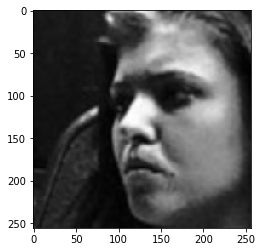

In [30]:
# Sort images to folders
prediction =  []
for img in os.listdir(f'{DATADIR}/test/'):
    image = cv2.imread(os.path.join(f'{DATADIR}/test/', img), cv2.IMREAD_GRAYSCALE)
    try:
        sample = prepare(img)
    except Exception as e:
        print(e)
    try:
        predict = model1.predict(sample)
        if float(predict[0][0]) >= 0.5:
            gender = "woman"
        else:
            gender = "man"

        print("Gender", gender)
        print(img)
        cv2.imwrite(f'{DATADIR}/test/{gender}/{img}', image)
    except Exception as e:
        print(e) 

In [32]:
folder = sorted(os.listdir(f'{DATADIR}/test'))
for path in folder:
    try:
        if path != ".DS_Store" and path != "man" and path != "woman":
            image = cv2.imread(os.path.join(f'{DATADIR}/test/', path), cv2.IMREAD_GRAYSCALE)
            print(path)
        
    except Exception as e:
        print(e)

2019-03-20T16_04_56+02_00.jpg
2019-03-20T16_05_25+02_00.jpg
2019-03-20T16_06_01+02_00.jpg
2019-03-20T16_06_39+02_00.jpg
2019-03-20T16_07_14+02_00.jpg
2019-03-20T16_07_49+02_00.jpg
2019-03-20T16_08_24+02_00.jpg
2019-03-20T16_08_59+02_00.jpg
2019-03-20T16_09_31+02_00.jpg
2019-03-20T16_10_06+02_00.jpg
2019-03-20T16_10_43+02_00.jpg
2019-03-20T16_11_21+02_00.jpg
2019-03-20T16_41_58+02_00.jpg
2019-03-20T16_42_33+02_00.jpg
2019-03-20T16_43_11+02_00.jpg
2019-03-20T16_43_49+02_00.jpg
2019-03-20T16_44_27+02_00.jpg
2019-03-20T16_45_01+02_00.jpg
2019-03-20T16_45_33+02_00.jpg
2019-03-20T16_46_11+02_00.jpg
2019-03-20T16_46_46+02_00.jpg
2019-03-20T16_47_18+02_00.jpg
2019-03-20T17_25_20+02_00.jpg
2019-03-20T17_25_55+02_00.jpg
2019-03-20T17_26_30+02_00.jpg
2019-03-20T17_27_05+02_00.jpg
2019-03-20T17_27_42+02_00.jpg
2019-03-20T17_28_22+02_00.jpg
2019-03-20T17_28_55+02_00.jpg
2019-03-20T17_29_30+02_00.jpg
2019-03-20T17_30_09+02_00.jpg
2019-03-20T17_30_46+02_00.jpg
2019-03-20T17_31_21+02_00.jpg
2019-03-20

2019-03-23T04_36_34+02_00.jpg
2019-03-23T04_37_09+02_00.jpg
2019-03-23T04_37_44+02_00.jpg
2019-03-23T04_38_22+02_00.jpg
2019-03-23T04_39_00+02_00.jpg
2019-03-23T04_39_32+02_00.jpg
2019-03-23T04_40_07+02_00.jpg
2019-03-23T04_40_42+02_00.jpg
2019-03-23T04_41_19+02_00.jpg
2019-03-23T04_42_00+02_00.jpg
2019-03-23T06_14_09+02_00.jpg
2019-03-23T06_14_47+02_00.jpg
2019-03-23T06_15_21+02_00.jpg
2019-03-23T06_15_56+02_00.jpg
2019-03-23T06_16_31+02_00.jpg
2019-03-23T06_17_11+02_00.jpg
2019-03-23T06_17_42+02_00.jpg
2019-03-23T06_18_20+02_00.jpg
2019-03-23T06_18_51+02_00.jpg
2019-03-23T06_19_27+02_00.jpg
2019-03-23T06_19_58+02_00.jpg
2019-03-23T06_20_33+02_00.jpg
2019-03-23T07_05_47+02_00.jpg
2019-03-23T07_06_19+02_00.jpg
2019-03-23T07_06_54+02_00.jpg
2019-03-23T07_07_26+02_00.jpg
2019-03-23T07_08_00+02_00.jpg
2019-03-23T07_08_33+02_00.jpg
2019-03-23T07_09_04+02_00.jpg
2019-03-23T07_09_39+02_00.jpg
2019-03-23T07_10_13+02_00.jpg
2019-03-23T07_10_48+02_00.jpg
2019-03-23T07_50_03+02_00.jpg
2019-03-23

2019-03-25T09_35_49+02_00.jpg
2019-03-25T09_35_58+02_00.jpg
2019-03-25T09_36_27+02_00.jpg
2019-03-25T09_37_02+02_00.jpg
2019-03-25T09_37_37+02_00.jpg
2019-03-25T09_37_39+02_00.jpg
2019-03-25T09_38_11+02_00.jpg
2019-03-25T09_38_17+02_00.jpg
2019-03-25T09_38_47+02_00.jpg
2019-03-25T09_38_52+02_00.jpg
2019-03-25T09_39_24+02_00.jpg
2019-03-25T09_40_03+02_00.jpg
2019-03-25T11_18_46+02_00.jpg
2019-03-25T11_19_24+02_00.jpg
2019-03-25T11_19_58+02_00.jpg
2019-03-25T11_20_29+02_00.jpg
2019-03-25T11_21_01+02_00.jpg
2019-03-25T11_21_36+02_00.jpg
2019-03-25T11_22_11+02_00.jpg
2019-03-25T11_22_46+02_00.jpg
2019-03-25T11_23_24+02_00.jpg
2019-03-25T11_23_56+02_00.jpg
2019-03-25T11_24_27+02_00.jpg
2019-03-25T11_25_05+02_00.jpg
2019-03-25T11_25_40+02_00.jpg
2019-03-25T12_23_14+02_00.jpg
2019-03-25T12_23_49+02_00.jpg
2019-03-25T12_24_24+02_00.jpg
2019-03-25T12_24_59+02_00.jpg
2019-03-25T12_25_33+02_00.jpg
2019-03-25T12_26_11+02_00.jpg
2019-03-25T12_26_43+02_00.jpg
2019-03-25T12_27_15+02_00.jpg
2019-03-25

2019-03-26T22_09_24+02_00.jpg
2019-03-26T22_09_56+02_00.jpg
2019-03-26T22_10_34+02_00.jpg
2019-03-26T22_11_08+02_00.jpg
2019-03-27T13_42_32+02_00.jpg
2019-03-27T13_43_08+02_00.jpg
2019-03-27T13_43_43+02_00.jpg
2019-03-27T13_44_21+02_00.jpg
2019-03-27T13_44_54+02_00.jpg
2019-03-27T13_45_29+02_00.jpg
2019-03-27T13_46_02+02_00.jpg
2019-03-27T13_46_37+02_00.jpg
2019-03-27T13_47_13+02_00.jpg
2019-03-27T13_47_48+02_00.jpg
2019-03-27T13_48_21+02_00.jpg
2019-03-27T14_33_47+02_00.jpg
2019-03-27T14_34_25+02_00.jpg
2019-03-27T14_35_00+02_00.jpg
2019-03-27T14_35_34+02_00.jpg
2019-03-27T14_36_03+02_00.jpg
2019-03-27T14_36_40+02_00.jpg
2019-03-27T14_37_12+02_00.jpg
2019-03-27T14_37_46+02_00.jpg
2019-03-27T14_38_18+02_00.jpg
2019-03-27T14_38_55+02_00.jpg
2019-03-27T14_52_55+02_00.jpg
2019-03-27T14_53_30+02_00.jpg
2019-03-27T14_54_04+02_00.jpg
2019-03-27T14_54_42+02_00.jpg
2019-03-27T14_55_13+02_00.jpg
2019-03-27T14_55_52+02_00.jpg
2019-03-27T14_56_28+02_00.jpg
2019-03-27T14_57_03+02_00.jpg
2019-03-27

2019-03-28T17_56_59+02_00.jpg
2019-03-28T17_57_36+02_00.jpg
2019-03-28T17_58_11+02_00.jpg
2019-03-28T17_58_43+02_00.jpg
2019-03-28T17_59_17+02_00.jpg
2019-03-28T17_59_49+02_00.jpg
2019-03-28T18_00_26+02_00.jpg
2019-03-28T18_01_04+02_00.jpg
2019-03-28T18_02_09+02_00.jpg
2019-03-28T19_36_01+02_00.jpg
2019-03-28T19_36_33+02_00.jpg
2019-03-28T19_37_08+02_00.jpg
2019-03-28T19_37_45+02_00.jpg
2019-03-28T19_38_20+02_00.jpg
2019-03-28T19_38_51+02_00.jpg
2019-03-28T19_39_23+02_00.jpg
2019-03-28T19_39_57+02_00.jpg
2019-03-28T19_40_35+02_00.jpg
2019-03-28T19_41_09+02_00.jpg
2019-03-28T20_11_36+02_00.jpg
2019-03-28T20_12_12+02_00.jpg
2019-03-28T20_12_46+02_00.jpg
2019-03-28T20_13_24+02_00.jpg
2019-03-28T20_13_59+02_00.jpg
2019-03-28T20_14_30+02_00.jpg
2019-03-28T20_15_05+02_00.jpg
2019-03-28T20_15_39+02_00.jpg
2019-03-28T20_16_14+02_00.jpg
2019-03-28T20_16_45+02_00.jpg
2019-03-28T20_17_51+02_00.jpg
2019-03-28T21_32_10+02_00.jpg
2019-03-28T21_32_45+02_00.jpg
2019-03-28T21_33_17+02_00.jpg
2019-03-28

2019-03-31T13_43_00+03_00.jpg
2019-03-31T13_43_34+03_00.jpg
2019-03-31T13_44_15+03_00.jpg
2019-03-31T13_44_53+03_00.jpg
2019-03-31T13_45_27+03_00.jpg
2019-03-31T14_22_50+03_00.jpg
2019-03-31T14_23_22+03_00.jpg
2019-03-31T14_23_59+03_00.jpg
2019-03-31T14_24_33+03_00.jpg
2019-03-31T14_25_11+03_00.jpg
2019-03-31T14_25_49+03_00.jpg
2019-03-31T14_27_03+03_00.jpg
2019-03-31T14_27_41+03_00.jpg
2019-03-31T14_28_12+03_00.jpg
2019-03-31T14_28_46+03_00.jpg
2019-03-31T16_30_50+03_00.jpg
2019-03-31T16_31_21+03_00.jpg
2019-03-31T16_31_56+03_00.jpg
2019-03-31T16_32_28+03_00.jpg
2019-03-31T16_33_05+03_00.jpg
2019-03-31T16_33_40+03_00.jpg
2019-03-31T16_34_15+03_00.jpg
2019-03-31T16_34_49+03_00.jpg
2019-03-31T16_35_24+03_00.jpg
2019-03-31T16_35_59+03_00.jpg
2019-03-31T19_55_13+03_00.jpg
2019-03-31T19_56_22+03_00.jpg
2019-03-31T19_56_57+03_00.jpg
2019-03-31T19_57_31+03_00.jpg
2019-03-31T19_58_03+03_00.jpg
2019-03-31T19_58_35+03_00.jpg
2019-03-31T19_59_09+03_00.jpg
2019-03-31T19_59_47+03_00.jpg
2019-03-31

2019-04-02T03_21_31+03_00.jpg
2019-04-02T03_22_08+03_00.jpg
2019-04-02T03_22_43+03_00.jpg
2019-04-02T03_23_21+03_00.jpg
2019-04-02T03_23_53+03_00.jpg
2019-04-02T03_24_24+03_00.jpg
2019-04-02T03_24_58+03_00.jpg
2019-04-02T03_25_36+03_00.jpg
2019-04-02T03_26_08+03_00.jpg
2019-04-02T03_26_42+03_00.jpg
2019-04-02T05_33_45+03_00.jpg
2019-04-02T05_34_19+03_00.jpg
2019-04-02T05_34_51+03_00.jpg
2019-04-02T05_35_23+03_00.jpg
2019-04-02T05_35_57+03_00.jpg
2019-04-02T05_36_29+03_00.jpg
2019-04-02T05_37_00+03_00.jpg
2019-04-02T05_37_33+03_00.jpg
2019-04-02T05_38_04+03_00.jpg
2019-04-02T05_38_39+03_00.jpg
2019-04-02T06_29_08+03_00.jpg
2019-04-02T06_29_45+03_00.jpg
2019-04-02T06_30_20+03_00.jpg
2019-04-02T06_30_57+03_00.jpg
2019-04-02T06_31_31+03_00.jpg
2019-04-02T06_32_45+03_00.jpg
2019-04-02T06_33_20+03_00.jpg
2019-04-02T06_33_49+03_00.jpg
2019-04-02T06_34_24+03_00.jpg
2019-04-02T09_26_33+03_00.jpg
2019-04-02T09_27_08+03_00.jpg
2019-04-02T09_27_46+03_00.jpg
2019-04-02T09_28_27+03_00.jpg
2019-04-02

2019-04-03T13_13_21+03_00.jpg
2019-04-03T13_13_58+03_00.jpg
2019-04-03T13_14_35+03_00.jpg
2019-04-03T13_15_12+03_00.jpg
2019-04-03T13_16_30+03_00.jpg
2019-04-03T13_17_05+03_00.jpg
2019-04-03T13_20_10+03_00.jpg
2019-04-03T13_20_42+03_00.jpg
2019-04-03T13_21_13+03_00.jpg
2019-04-03T13_21_48+03_00.jpg
2019-04-03T13_22_23+03_00.jpg
2019-04-03T13_22_58+03_00.jpg
2019-04-03T13_23_32+03_00.jpg
2019-04-03T13_24_10+03_00.jpg
2019-04-03T13_24_44+03_00.jpg
2019-04-03T13_25_19+03_00.jpg
2019-04-03T13_25_53+03_00.jpg
2019-04-03T13_31_12+03_00.jpg
2019-04-03T13_31_49+03_00.jpg
2019-04-03T13_32_21+03_00.jpg
2019-04-03T13_32_53+03_00.jpg
2019-04-03T13_33_24+03_00.jpg
2019-04-03T13_33_59+03_00.jpg
2019-04-03T13_34_36+03_00.jpg
2019-04-03T13_35_11+03_00.jpg
2019-04-03T13_35_43+03_00.jpg
2019-04-03T13_36_14+03_00.jpg
2019-04-03T13_36_49+03_00.jpg
2019-04-03T13_37_23+03_00.jpg
2019-04-03T13_45_25+03_00.jpg
2019-04-03T13_45_59+03_00.jpg
2019-04-03T13_46_34+03_00.jpg
2019-04-03T13_47_05+03_00.jpg
2019-04-03

2019-04-04T21_03_24+03_00.jpg
2019-04-04T21_04_05+03_00.jpg
2019-04-04T21_04_37+03_00.jpg
2019-04-04T21_05_14+03_00.jpg
2019-04-04T21_05_43+03_00.jpg
2019-04-04T21_06_14+03_00.jpg
2019-04-04T21_06_49+03_00.jpg
2019-04-04T21_07_26+03_00.jpg
2019-04-04T22_09_30+03_00.jpg
2019-04-04T22_10_10+03_00.jpg
2019-04-04T22_10_47+03_00.jpg
2019-04-04T22_11_36+03_00.jpg
2019-04-04T22_12_11+03_00.jpg
2019-04-04T22_12_48+03_00.jpg
2019-04-04T22_13_33+03_00.jpg
2019-04-04T22_14_19+03_00.jpg
2019-04-04T22_14_53+03_00.jpg
2019-04-04T22_15_28+03_00.jpg
2019-04-05T00_12_40+03_00.jpg
2019-04-05T00_13_58+03_00.jpg
2019-04-05T00_14_32+03_00.jpg
2019-04-05T00_15_06+03_00.jpg
2019-04-05T00_15_41+03_00.jpg
2019-04-05T00_16_12+03_00.jpg
2019-04-05T00_16_50+03_00.jpg
2019-04-05T00_17_21+03_00.jpg
2019-04-05T00_17_56+03_00.jpg
2019-04-05T00_54_11+03_00.jpg
2019-04-05T00_54_49+03_00.jpg
2019-04-05T00_55_23+03_00.jpg
2019-04-05T00_56_32+03_00.jpg
2019-04-05T00_57_07+03_00.jpg
2019-04-05T00_57_38+03_00.jpg
2019-04-05

In [33]:
labeled_list = []
for name in class_names:
    for path in os.listdir(os.path.join(f'{DATADIR}/test', name)):
        if path != ".DS_Store" and path != "man" and path != "woman":
            ind = class_names.index(name)
            labeled_list.append((path,ind))

In [34]:
labeled_list = sorted(labeled_list)

In [35]:
labeled_list

[('2019-03-20T16_04_56+02_00.jpg', 0),
 ('2019-03-20T16_06_01+02_00.jpg', 0),
 ('2019-03-20T16_06_39+02_00.jpg', 0),
 ('2019-03-20T16_07_49+02_00.jpg', 0),
 ('2019-03-20T16_08_24+02_00.jpg', 0),
 ('2019-03-20T16_08_59+02_00.jpg', 0),
 ('2019-03-20T16_09_31+02_00.jpg', 1),
 ('2019-03-20T16_10_06+02_00.jpg', 0),
 ('2019-03-20T16_10_43+02_00.jpg', 1),
 ('2019-03-20T16_11_21+02_00.jpg', 1),
 ('2019-03-20T16_41_58+02_00.jpg', 0),
 ('2019-03-20T16_42_33+02_00.jpg', 1),
 ('2019-03-20T16_43_11+02_00.jpg', 0),
 ('2019-03-20T16_43_49+02_00.jpg', 1),
 ('2019-03-20T16_44_27+02_00.jpg', 0),
 ('2019-03-20T16_45_33+02_00.jpg', 0),
 ('2019-03-20T16_46_46+02_00.jpg', 0),
 ('2019-03-20T17_25_20+02_00.jpg', 1),
 ('2019-03-20T17_26_30+02_00.jpg', 1),
 ('2019-03-20T17_28_55+02_00.jpg', 0),
 ('2019-03-20T17_29_30+02_00.jpg', 1),
 ('2019-03-20T17_30_09+02_00.jpg', 1),
 ('2019-03-20T17_30_46+02_00.jpg', 0),
 ('2019-03-20T18_59_07+02_00.jpg', 0),
 ('2019-03-20T18_59_42+02_00.jpg', 0),
 ('2019-03-20T19_00_20+02

In [36]:
Y_test = []
list_path = []
for x, i in labeled_list:
    Y_test.append(i)
    list_path.append(x)

In [37]:
Y_test

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [38]:
list_path

['2019-03-20T16_04_56+02_00.jpg',
 '2019-03-20T16_06_01+02_00.jpg',
 '2019-03-20T16_06_39+02_00.jpg',
 '2019-03-20T16_07_49+02_00.jpg',
 '2019-03-20T16_08_24+02_00.jpg',
 '2019-03-20T16_08_59+02_00.jpg',
 '2019-03-20T16_09_31+02_00.jpg',
 '2019-03-20T16_10_06+02_00.jpg',
 '2019-03-20T16_10_43+02_00.jpg',
 '2019-03-20T16_11_21+02_00.jpg',
 '2019-03-20T16_41_58+02_00.jpg',
 '2019-03-20T16_42_33+02_00.jpg',
 '2019-03-20T16_43_11+02_00.jpg',
 '2019-03-20T16_43_49+02_00.jpg',
 '2019-03-20T16_44_27+02_00.jpg',
 '2019-03-20T16_45_33+02_00.jpg',
 '2019-03-20T16_46_46+02_00.jpg',
 '2019-03-20T17_25_20+02_00.jpg',
 '2019-03-20T17_26_30+02_00.jpg',
 '2019-03-20T17_28_55+02_00.jpg',
 '2019-03-20T17_29_30+02_00.jpg',
 '2019-03-20T17_30_09+02_00.jpg',
 '2019-03-20T17_30_46+02_00.jpg',
 '2019-03-20T18_59_07+02_00.jpg',
 '2019-03-20T18_59_42+02_00.jpg',
 '2019-03-20T19_00_20+02_00.jpg',
 '2019-03-20T19_00_59+02_00.jpg',
 '2019-03-20T19_01_31+02_00.jpg',
 '2019-03-20T19_02_03+02_00.jpg',
 '2019-03-20T1

Found 1 faces
2019-03-20T16_04_56+02_00.jpg
Found 1 faces
2019-03-20T16_06_01+02_00.jpg
Found 1 faces
2019-03-20T16_06_39+02_00.jpg
Found 1 faces
2019-03-20T16_07_49+02_00.jpg
Found 1 faces
2019-03-20T16_08_24+02_00.jpg
Found 1 faces
2019-03-20T16_08_59+02_00.jpg
Found 1 faces
2019-03-20T16_09_31+02_00.jpg
Found 1 faces
2019-03-20T16_10_06+02_00.jpg
Found 1 faces
2019-03-20T16_10_43+02_00.jpg
Found 1 faces
2019-03-20T16_11_21+02_00.jpg
Found 1 faces
2019-03-20T16_41_58+02_00.jpg
Found 1 faces
2019-03-20T16_42_33+02_00.jpg
Found 1 faces
2019-03-20T16_43_11+02_00.jpg
Found 1 faces
2019-03-20T16_43_49+02_00.jpg
Found 1 faces
2019-03-20T16_44_27+02_00.jpg
Found 1 faces
2019-03-20T16_45_33+02_00.jpg
Found 1 faces
2019-03-20T16_46_46+02_00.jpg
Found 1 faces
2019-03-20T17_25_20+02_00.jpg
Found 1 faces
2019-03-20T17_26_30+02_00.jpg
Found 1 faces
2019-03-20T17_28_55+02_00.jpg
Found 1 faces
2019-03-20T17_29_30+02_00.jpg
Found 1 faces
2019-03-20T17_30_09+02_00.jpg
Found 1 faces
2019-03-20T17_30_4

2019-03-22T13_28_40+02_00.jpg
Found 1 faces
2019-03-22T13_29_21+02_00.jpg
Found 1 faces
2019-03-22T13_29_56+02_00.jpg
Found 1 faces
2019-03-22T13_30_28+02_00.jpg
Found 1 faces
2019-03-22T13_31_06+02_00.jpg
Found 1 faces
2019-03-22T15_12_58+02_00.jpg
Found 1 faces
2019-03-22T15_13_29+02_00.jpg
Found 1 faces
2019-03-22T15_15_18+02_00.jpg
Found 1 faces
2019-03-22T15_15_53+02_00.jpg
Found 1 faces
2019-03-22T15_16_28+02_00.jpg
Found 1 faces
2019-03-22T15_17_43+02_00.jpg
Found 1 faces
2019-03-22T19_14_22+02_00.jpg
Found 1 faces
2019-03-22T19_15_38+02_00.jpg
Found 1 faces
2019-03-22T19_16_15+02_00.jpg
Found 1 faces
2019-03-22T19_17_59+02_00.jpg
Found 1 faces
2019-03-22T19_18_31+02_00.jpg
Found 1 faces
2019-03-22T19_19_06+02_00.jpg
Found 1 faces
2019-03-22T19_19_38+02_00.jpg
Found 1 faces
2019-03-22T19_20_16+02_00.jpg
Found 1 faces
2019-03-22T20_21_02+02_00.jpg
Found 1 faces
2019-03-22T20_21_39+02_00.jpg
Found 1 faces
2019-03-22T20_22_17+02_00.jpg
Found 1 faces
2019-03-22T20_22_52+02_00.jpg
Fo

2019-03-24T10_13_35+02_00.jpg
Found 1 faces
2019-03-24T10_14_12+02_00.jpg
Found 1 faces
2019-03-24T10_14_47+02_00.jpg
Found 1 faces
2019-03-24T11_54_13+02_00.jpg
Found 1 faces
2019-03-24T11_54_51+02_00.jpg
Found 1 faces
2019-03-24T11_55_26+02_00.jpg
Found 1 faces
2019-03-24T11_56_01+02_00.jpg
Found 1 faces
2019-03-24T11_56_36+02_00.jpg
Found 1 faces
2019-03-24T11_57_10+02_00.jpg
Found 1 faces
2019-03-24T11_57_47+02_00.jpg
Found 1 faces
2019-03-24T11_58_51+02_00.jpg
Found 1 faces
2019-03-24T12_14_09+02_00.jpg
Found 1 faces
2019-03-24T12_14_44+02_00.jpg
Found 1 faces
2019-03-24T12_15_19+02_00.jpg
Found 1 faces
2019-03-24T12_15_54+02_00.jpg
Found 1 faces
2019-03-24T12_17_33+02_00.jpg
Found 1 faces
2019-03-24T12_18_11+02_00.jpg
Found 1 faces
2019-03-24T12_18_45+02_00.jpg
Found 1 faces
2019-03-24T12_19_23+02_00.jpg
Found 1 faces
2019-03-24T13_15_18+02_00.jpg
Found 1 faces
2019-03-24T13_15_54+02_00.jpg
Found 1 faces
2019-03-24T13_16_28+02_00.jpg
Found 1 faces
2019-03-24T13_17_03+02_00.jpg
Fo

Found 1 faces
2019-03-26T00_37_44+02_00.jpg
Found 1 faces
2019-03-26T00_38_16+02_00.jpg
Found 1 faces
2019-03-26T00_38_48+02_00.jpg
Found 1 faces
2019-03-26T00_39_23+02_00.jpg
Found 1 faces
2019-03-26T00_39_58+02_00.jpg
Found 1 faces
2019-03-26T00_40_32+02_00.jpg
Found 1 faces
2019-03-26T00_41_10+02_00.jpg
Found 1 faces
2019-03-26T00_41_48+02_00.jpg
Found 1 faces
2019-03-26T00_42_29+02_00.jpg
Found 1 faces
2019-03-26T01_09_08+02_00.jpg
Found 1 faces
2019-03-26T01_10_15+02_00.jpg
Found 1 faces
2019-03-26T01_10_50+02_00.jpg
Found 1 faces
2019-03-26T01_11_21+02_00.jpg
Found 1 faces
2019-03-26T01_11_56+02_00.jpg
Found 1 faces
2019-03-26T01_12_28+02_00.jpg
Found 1 faces
2019-03-26T01_13_03+02_00.jpg
Found 1 faces
2019-03-26T01_13_41+02_00.jpg
Found 1 faces
2019-03-26T10_35_10+02_00.jpg
Found 1 faces
2019-03-26T10_35_45+02_00.jpg
Found 1 faces
2019-03-26T10_37_01+02_00.jpg
Found 1 faces
2019-03-26T10_37_39+02_00.jpg
Found 1 faces
2019-03-26T10_38_11+02_00.jpg
Found 1 faces
2019-03-26T10_38_4

2019-03-27T16_08_27+02_00.jpg
Found 1 faces
2019-03-27T19_38_48+02_00.jpg
Found 1 faces
2019-03-27T19_39_20+02_00.jpg
Found 1 faces
2019-03-27T19_39_55+02_00.jpg
Found 1 faces
2019-03-27T19_40_32+02_00.jpg
Found 1 faces
2019-03-27T19_41_10+02_00.jpg
Found 1 faces
2019-03-27T19_41_45+02_00.jpg
Found 1 faces
2019-03-27T19_42_19+02_00.jpg
Found 1 faces
2019-03-27T19_42_51+02_00.jpg
Found 1 faces
2019-03-27T19_44_38+02_00.jpg
Found 1 faces
2019-03-27T19_45_13+02_00.jpg
Found 1 faces
2019-03-27T20_15_16+02_00.jpg
Found 1 faces
2019-03-27T20_15_54+02_00.jpg
Found 1 faces
2019-03-27T20_16_31+02_00.jpg
Found 1 faces
2019-03-27T20_17_41+02_00.jpg
Found 1 faces
2019-03-27T20_18_18+02_00.jpg
Found 1 faces
2019-03-27T20_18_50+02_00.jpg
Found 1 faces
2019-03-27T20_19_21+02_00.jpg
Found 1 faces
2019-03-27T20_19_55+02_00.jpg
Found 1 faces
2019-03-27T20_21_05+02_00.jpg
Found 1 faces
2019-03-27T20_21_42+02_00.jpg
Found 1 faces
2019-03-27T21_20_05+02_00.jpg
Found 1 faces
2019-03-27T21_20_43+02_00.jpg
Fo

Found 1 faces
2019-03-28T16_25_24+02_00.jpg
Found 1 faces
2019-03-28T16_25_58+02_00.jpg
Found 1 faces
2019-03-28T16_26_34+02_00.jpg
Found 1 faces
2019-03-28T16_27_40+02_00.jpg
Found 1 faces
2019-03-28T16_28_14+02_00.jpg
Found 1 faces
2019-03-28T16_29_55+02_00.jpg
Found 1 faces
2019-03-28T16_30_33+02_00.jpg
Found 1 faces
2019-03-28T17_21_40+02_00.jpg
Found 1 faces
2019-03-28T17_22_14+02_00.jpg
Found 1 faces
2019-03-28T17_22_52+02_00.jpg
Found 1 faces
2019-03-28T17_23_29+02_00.jpg
Found 1 faces
2019-03-28T17_24_04+02_00.jpg
Found 1 faces
2019-03-28T17_25_57+02_00.jpg
Found 1 faces
2019-03-28T17_27_10+02_00.jpg
Found 1 faces
2019-03-28T17_27_47+02_00.jpg
Found 1 faces
2019-03-28T17_28_21+02_00.jpg
Found 1 faces
2019-03-28T17_55_19+02_00.jpg
Found 1 faces
2019-03-28T17_55_54+02_00.jpg
Found 1 faces
2019-03-28T17_56_59+02_00.jpg
Found 1 faces
2019-03-28T17_58_11+02_00.jpg
Found 1 faces
2019-03-28T17_58_43+02_00.jpg
Found 1 faces
2019-03-28T17_59_17+02_00.jpg
Found 1 faces
2019-03-28T17_59_4

2019-03-29T20_23_28+03_00.jpg
Found 1 faces
2019-03-29T20_24_06+03_00.jpg
Found 1 faces
2019-03-29T20_24_40+03_00.jpg
Found 1 faces
2019-03-29T20_25_14+03_00.jpg
Found 1 faces
2019-03-29T20_25_49+03_00.jpg
Found 1 faces
2019-03-29T20_26_26+03_00.jpg
Found 1 faces
2019-03-29T22_16_58+03_00.jpg
Found 1 faces
2019-03-29T22_17_30+03_00.jpg
Found 1 faces
2019-03-29T22_18_02+03_00.jpg
Found 1 faces
2019-03-29T22_18_39+03_00.jpg
Found 1 faces
2019-03-29T22_19_48+03_00.jpg
Found 1 faces
2019-03-29T22_20_23+03_00.jpg
Found 1 faces
2019-03-29T22_21_03+03_00.jpg
Found 1 faces
2019-03-29T22_21_37+03_00.jpg
Found 1 faces
2019-03-29T22_22_15+03_00.jpg
Found 1 faces
2019-03-29T22_22_55+03_00.jpg
Found 1 faces
2019-03-29T22_42_19+03_00.jpg
Found 1 faces
2019-03-29T22_42_51+03_00.jpg
Found 1 faces
2019-03-29T22_44_00+03_00.jpg
Found 1 faces
2019-03-29T22_44_31+03_00.jpg
Found 1 faces
2019-03-29T22_45_06+03_00.jpg
Found 1 faces
2019-03-29T22_46_15+03_00.jpg
Found 1 faces
2019-03-29T22_46_49+03_00.jpg
Fo

Found 1 faces
2019-04-01T13_32_45+03_00.jpg
Found 1 faces
2019-04-01T13_33_17+03_00.jpg
Found 1 faces
2019-04-01T13_33_54+03_00.jpg
Found 1 faces
2019-04-01T13_34_25+03_00.jpg
Found 1 faces
2019-04-01T13_34_57+03_00.jpg
Found 1 faces
2019-04-01T13_35_29+03_00.jpg
Found 1 faces
2019-04-01T13_36_04+03_00.jpg
Found 1 faces
2019-04-01T13_36_39+03_00.jpg
Found 1 faces
2019-04-01T13_37_51+03_00.jpg
Found 1 faces
2019-04-01T13_38_22+03_00.jpg
Found 1 faces
2019-04-01T13_38_57+03_00.jpg
Found 1 faces
2019-04-01T13_39_31+03_00.jpg
Found 1 faces
2019-04-01T13_41_19+03_00.jpg
Found 1 faces
2019-04-01T13_41_54+03_00.jpg
Found 1 faces
2019-04-01T13_42_31+03_00.jpg
Found 1 faces
2019-04-01T13_43_08+03_00.jpg
Found 1 faces
2019-04-01T13_43_45+03_00.jpg
Found 1 faces
2019-04-01T15_00_58+03_00.jpg
Found 1 faces
2019-04-01T15_01_33+03_00.jpg
Found 1 faces
2019-04-01T15_02_40+03_00.jpg
Found 1 faces
2019-04-01T15_04_29+03_00.jpg
Found 1 faces
2019-04-01T15_05_07+03_00.jpg
Found 1 faces
2019-04-01T15_05_4

2019-04-02T13_05_34+03_00.jpg
Found 1 faces
2019-04-02T13_06_09+03_00.jpg
Found 1 faces
2019-04-02T13_07_24+03_00.jpg
Found 1 faces
2019-04-02T13_07_59+03_00.jpg
Found 1 faces
2019-04-02T13_08_34+03_00.jpg
Found 1 faces
2019-04-02T13_09_06+03_00.jpg
Found 1 faces
2019-04-02T13_09_38+03_00.jpg
Found 1 faces
2019-04-02T13_10_13+03_00.jpg
Found 1 faces
2019-04-02T13_10_51+03_00.jpg
Found 1 faces
2019-04-02T14_46_59+03_00.jpg
Found 1 faces
2019-04-02T14_47_36+03_00.jpg
Found 1 faces
2019-04-02T14_48_11+03_00.jpg
Found 1 faces
2019-04-02T14_48_44+03_00.jpg
Found 1 faces
2019-04-02T14_49_17+03_00.jpg
Found 1 faces
2019-04-02T14_50_33+03_00.jpg
Found 1 faces
2019-04-02T14_51_08+03_00.jpg
Found 1 faces
2019-04-02T14_51_43+03_00.jpg
Found 1 faces
2019-04-02T18_59_19+03_00.jpg
Found 1 faces
2019-04-02T18_59_54+03_00.jpg
Found 1 faces
2019-04-02T19_00_31+03_00.jpg
Found 1 faces
2019-04-02T19_01_06+03_00.jpg
Found 1 faces
2019-04-02T19_01_40+03_00.jpg
Found 1 faces
2019-04-02T19_02_56+03_00.jpg
Fo

Found 1 faces
2019-04-03T12_41_17+03_00.jpg
Found 1 faces
2019-04-03T12_42_23+03_00.jpg
Found 1 faces
2019-04-03T12_42_52+03_00.jpg
Found 1 faces
2019-04-03T12_43_58+03_00.jpg
Found 1 faces
2019-04-03T12_44_35+03_00.jpg
Found 1 faces
2019-04-03T12_45_09+03_00.jpg
Found 1 faces
2019-04-03T12_45_44+03_00.jpg
Found 1 faces
2019-04-03T13_10_53+03_00.jpg
Found 1 faces
2019-04-03T13_11_31+03_00.jpg
Found 1 faces
2019-04-03T13_12_06+03_00.jpg
Found 1 faces
2019-04-03T13_12_43+03_00.jpg
Found 1 faces
2019-04-03T13_13_58+03_00.jpg
Found 1 faces
2019-04-03T13_14_35+03_00.jpg
Found 1 faces
2019-04-03T13_15_12+03_00.jpg
Found 1 faces
2019-04-03T13_16_30+03_00.jpg
Found 1 faces
2019-04-03T13_20_10+03_00.jpg
Found 1 faces
2019-04-03T13_20_42+03_00.jpg
Found 1 faces
2019-04-03T13_21_48+03_00.jpg
Found 1 faces
2019-04-03T13_22_23+03_00.jpg
Found 1 faces
2019-04-03T13_23_32+03_00.jpg
Found 1 faces
2019-04-03T13_24_10+03_00.jpg
Found 1 faces
2019-04-03T13_24_44+03_00.jpg
Found 1 faces
2019-04-03T13_25_1

2019-04-04T15_50_40+03_00.jpg
Found 1 faces
2019-04-04T15_51_11+03_00.jpg
Found 1 faces
2019-04-04T16_16_03+03_00.jpg
Found 1 faces
2019-04-04T16_16_41+03_00.jpg
Found 1 faces
2019-04-04T16_17_18+03_00.jpg
Found 1 faces
2019-04-04T16_17_59+03_00.jpg
Found 1 faces
2019-04-04T16_18_33+03_00.jpg
Found 1 faces
2019-04-04T16_19_13+03_00.jpg
Found 1 faces
2019-04-04T16_19_45+03_00.jpg
Found 1 faces
2019-04-04T16_20_16+03_00.jpg
Found 1 faces
2019-04-04T16_20_54+03_00.jpg
Found 1 faces
2019-04-04T16_21_28+03_00.jpg
Found 1 faces
2019-04-04T16_31_46+03_00.jpg
Found 1 faces
2019-04-04T16_32_20+03_00.jpg
Found 1 faces
2019-04-04T16_32_54+03_00.jpg
Found 1 faces
2019-04-04T16_34_00+03_00.jpg
Found 1 faces
2019-04-04T16_34_35+03_00.jpg
Found 1 faces
2019-04-04T16_35_09+03_00.jpg
Found 1 faces
2019-04-04T16_35_44+03_00.jpg
Found 1 faces
2019-04-04T16_36_18+03_00.jpg
Found 1 faces
2019-04-04T16_36_53+03_00.jpg
Found 1 faces
2019-04-04T16_37_27+03_00.jpg
Found 1 faces
2019-04-04T16_37_58+03_00.jpg
Fo

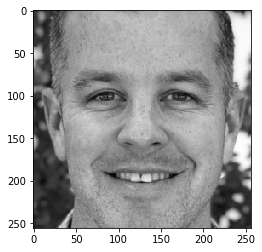

In [40]:
# CONF MATRIX / CLASS REPORT
prediction =  []
for path in list_path:
    image = cv2.imread(os.path.join(f'{DATADIR}/test/', path), cv2.IMREAD_GRAYSCALE)
    try:
        sample = prepare(image)
    except Exception as e:
        print(e)
    try:
        predict = model1.predict(sample)
        print(path)
        if float(predict[0][0]) >= 0.5:
                prediction.append(1)
        else:
                prediction.append(0)
    except Exception as e:
        print(e) 

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
len(prediction)

2056

In [43]:
len(Y_test)

2056

In [44]:
accuracy_score(Y_test, prediction)

0.933852140077821

In [45]:
from sklearn.metrics  import confusion_matrix, classification_report

In [46]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1318
           1       0.91      0.91      0.91       738

   micro avg       0.93      0.93      0.93      2056
   macro avg       0.93      0.93      0.93      2056
weighted avg       0.93      0.93      0.93      2056



In [47]:
confusion_matrix(Y_test, prediction)

array([[1252,   66],
       [  70,  668]])

In [ ]:
# model.save_weights("model_weights.h5")

In [ ]:
# model.save('model.h5')

In [ ]:
# from tensorflow.keras.applications.vgg16  import VGG16

In [ ]:
# model4 = VGG16()

In [ ]:
tf.__version__